In [32]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import scikit-learn functions
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from collections import Counter

import builtins

def print(*args, **kwargs):
    kwargs["sep"] = ""
    return builtins.print(*args, **kwargs)


plt.rcParams["figure.figsize"] = (6, 4)
# Change to stix
plt.rcParams["font.family"] = "STIXGeneral"

import warnings
warnings.filterwarnings("ignore")

### Lab Task 1

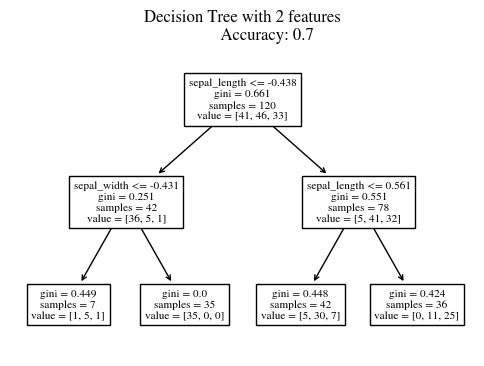

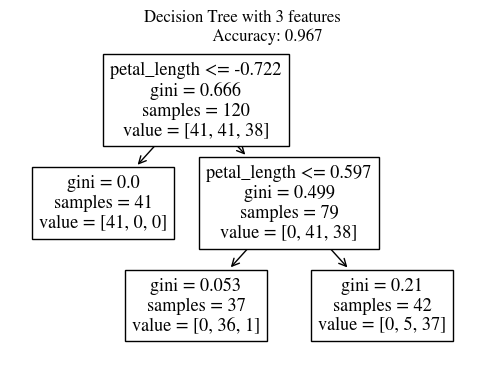

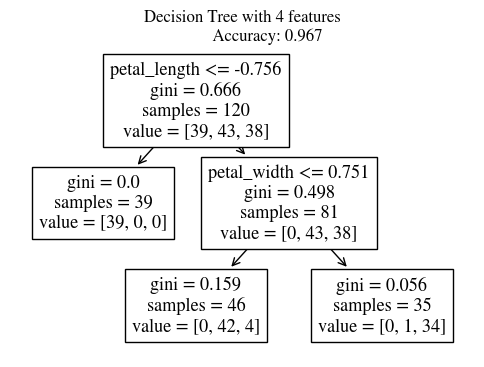

In [33]:
"""
Download a dataset containing at least 4 feature columns and a label column containing discrete data. Use functions from Sci-kit learn to train a model using decision trees. Try the following feature combinations:

•	2 features combination
•	3 features combination
•	4 features combination

Display the trained trees and also use the trees to make the predictions for all of the 3 combinations. Provide the code and all of the relevant screenshots of your work.
"""

# Load the dataset
data = pd.read_csv("iris.csv")
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
label = "species"

# Create subsets of the data with different numbers of features
X_f2 = data[features[:2]]
X_f3 = data[features[:3]]
X_f4 = data[features[:4]]
y = data[label]
X = [X_f2, X_f3, X_f4]

# Loop over the subsets
for i, x in enumerate(X):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    # Scale the features
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a decision tree classifier
    model = DecisionTreeClassifier(max_depth=2)
    model.fit(X_train, y_train)

    # Plot the decision tree
    plot_tree(model, feature_names=list(x.columns))
    plt.title(
        f"Decision Tree with {i+2} features\n\
            Accuracy: {model.score(X_test, y_test).round(3)}"
    )
    plt.show()

### Lab Task 2

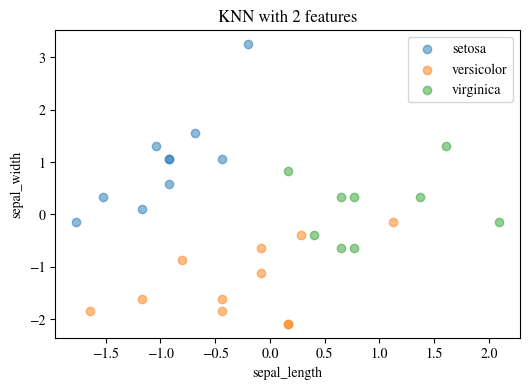

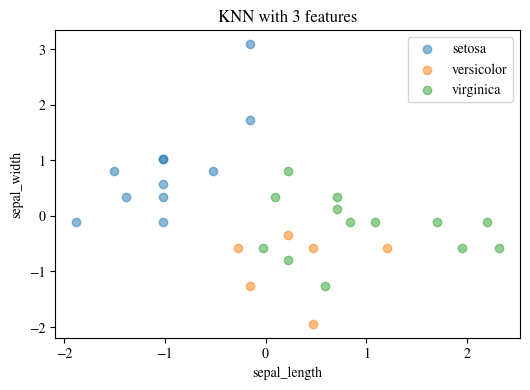

In [34]:
"""
Download a dataset containing at least 3 feature columns and a label column containing discrete data. Write a python program from scratch that uses KNNs to predict the class of an example for the following cases:

•	2 features combination
•	3 features combination

Make a scatter plot showing the predictions in both cases.
"""

# Load the dataset
data = pd.read_csv("iris.csv")
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
label = "species"

# Create subsets of the data with different numbers of features
X_f2 = data[features[:2]]
X_f3 = data[features[:3]]
y = data[label]
X = [X_f2, X_f3]

def custom_knn(X_train, y_train, X_test, k=5):
    predictions = []
    
    for test_point in X_test:
        # Calculate the euclidean distance
        distances = np.linalg.norm(X_train - test_point, axis=1)
        sorted_indices = np.argsort(distances)
        
        # Get the labels and counts of the k nearest neighbors
        k_nearest_labels = y_train.iloc[sorted_indices[:k]]
        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
        
        # Get the most common label
        predicted_label = unique_labels[np.argmax(counts)]
        predictions.append(predicted_label)
    
    return np.array(predictions)

# Labels for the plot
leglabels = ["setosa", "versicolor", "virginica"]

# Loop over the subsets
for i, x in enumerate(X):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    # Standardize the features
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a K-nearest neighbors model
    y_pred = custom_knn(X_train, y_train, X_test, k=5)

    # Plot the test set and the predictions
    for k in range(3):
        plt.scatter(
            X_test[y_pred == k, 0],
            X_test[y_pred == k, 1],
            label=leglabels[k],
            alpha=0.5,
        )
    plt.xlabel(x.columns[0])
    plt.ylabel(x.columns[1])
    plt.title(f"KNN with {i+2} features")
    plt.legend()
    plt.show()

### Lab Task 3

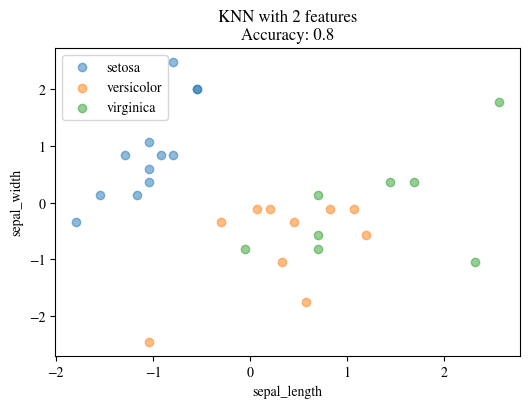

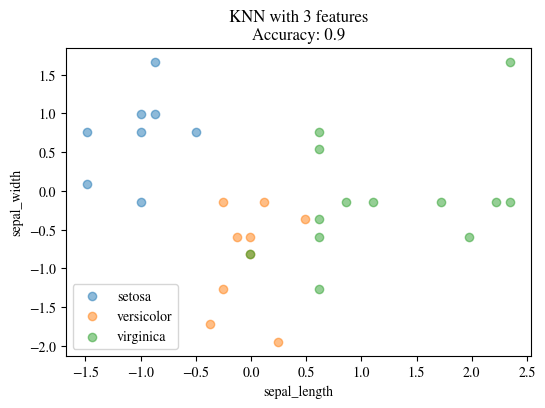

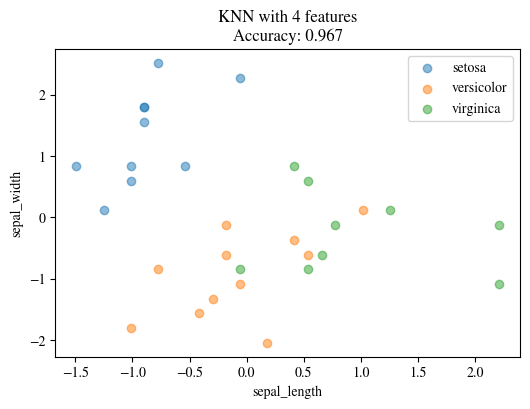

In [35]:
"""
Download a dataset containing at least 4 feature columns and a label column containing discrete data. Use functions from Sci-kit learn to predict the class of an example using KNNs for the following cases:

•	2 features combination
•	3 features combination
•	4 features combination

Make a scatter plot showing the predictions in both cases.
"""

# Load the dataset
data = pd.read_csv("iris.csv")
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
label = "species"

# Create subsets of the data with different numbers of features
X_f2 = data[features[:2]]
X_f3 = data[features[:3]]
X_f4 = data[features[:4]]
y = data[label]
X = [X_f2, X_f3, X_f4]

# Labels for the plot
leglabels = ["setosa", "versicolor", "virginica"]

# Loop over the subsets
for i, x in enumerate(X):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    # Standardize the features
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a K-nearest neighbors model
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    
    # Predict the labels of the test set
    y_pred = model.predict(X_test)
    
    # Plot the test set and the predictions
    for k in range(3):
        plt.scatter(
            X_test[y_pred == k, 0],
            X_test[y_pred == k, 1],
            label=leglabels[k],
            alpha=0.5,
        )
        plt.legend()
    plt.xlabel(x.columns[0])
    plt.ylabel(x.columns[1])
    plt.title(f"KNN with {i+2} features\nAccuracy: {model.score(X_test, y_test).round(3)}")
    plt.show()

### Lab Task 4

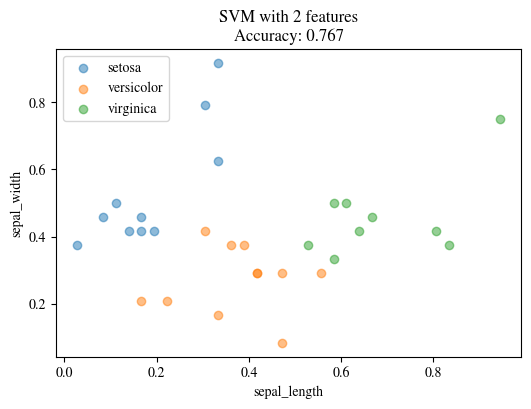

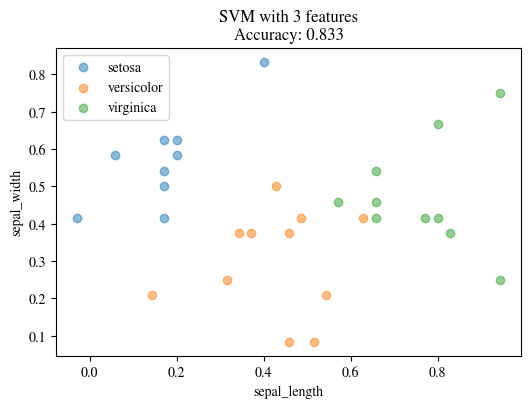

In [36]:
"""
Download a dataset containing at least 4 feature columns and a label column containing discrete data. Use functions from Sci-kit learn to predict the class of an example using Support Vector Machines for the following cases:

•	2 features combination
•	3 features combination

Make a scatter plot showing the predictions in both cases.
"""

# Load the dataset
data = pd.read_csv("iris.csv")
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
label = "species"

# Create subsets of the data with different numbers of features
X_f2 = data[features[:2]]
X_f3 = data[features[:3]]
y = data[label]
X = [X_f2, X_f3]

# Labels for the plot
leglabels = ["setosa", "versicolor", "virginica"]

# Loop over the subsets
for i, x in enumerate(X):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    # Standardize the features
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    model = SVC(kernel="linear")
    model.fit(X_train, y_train)
    
    # Predict the labels of the test set
    y_pred = model.predict(X_test)

    # Visualize the svm
    for k in range(3):
        plt.scatter(
            X_test[y_pred == k, 0],
            X_test[y_pred == k, 1],
            label=leglabels[k],
            alpha=0.5,
        )
    plt.xlabel(x.columns[0])
    plt.ylabel(x.columns[1])
    plt.legend()
    plt.title(f"SVM with {i+2} features\nAccuracy: {model.score(X_test, y_test).round(3)}")
    plt.show()